In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("S02-hw-dataset.csv")

In [6]:
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


(   user_id   age country  purchases  revenue
 0        1  25.0      FR          7      749
 1        2  24.0      RU          5     1115
 2        3  52.0      FR          7      399
 3        4  31.0      RU          6      654
 4        5   NaN      DE          6     1296,
 None,
          user_id         age  purchases      revenue
 count  41.000000   39.000000  41.000000    41.000000
 mean   20.243902   36.512821   4.829268   820.048780
 std    11.659289   18.304259   2.710189   613.127269
 min     1.000000    5.000000  -1.000000     0.000000
 25%    10.000000   24.000000   3.000000   432.000000
 50%    20.000000   33.000000   5.000000   693.000000
 75%    30.000000   45.500000   7.000000  1115.000000
 max    40.000000  120.000000  11.000000  2475.000000)

In [10]:
pd.isna(data).mean(), data.duplicated()

(user_id      0.00000
 age          0.04878
 country      0.00000
 purchases    0.00000
 revenue      0.00000
 dtype: float64,
 0     False
 1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25    False
 26    False
 27    False
 28    False
 29    False
 30    False
 31    False
 32    False
 33    False
 34    False
 35    False
 36    False
 37    False
 38    False
 39    False
 40     True
 dtype: bool)

In [30]:
(data[data['purchases'] < 0], 
 data[data['age'] > 100], 
 data[data['age'] < 18], 
 data[(data['purchases'] != 0) & (data['revenue'] == 0)],
 data[(data['purchases'] == 0) & (data['revenue'] != 0)],
 )

(   user_id    age country  purchases  revenue
 5        6  120.0      FR         -1      785,
    user_id    age country  purchases  revenue
 5        6  120.0      FR         -1      785,
     user_id  age country  purchases  revenue
 20       21  5.0      RU          8     1488,
     user_id   age country  purchases  revenue
 10       11  24.0      US          4        0,
 Empty DataFrame
 Columns: [user_id, age, country, purchases, revenue]
 Index: [])

In [ ]:
# В датасете присутствуют пропущенные значения в столбце age, один полный дубликат строки.

# Наиболее существенные аномалии: 1) отрицательное значение в поле purchases; 2) нереалистичный возраст; 3) Нулевого доход при ненулевых покупках

In [32]:
data['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [33]:
data.groupby('country').agg({
    'user_id': 'count',
    'age': ['mean', 'median', 'min', 'max'],
    'purchases': ['mean', 'sum', 'median'],
    'revenue': ['mean', 'sum', 'median']
}).round(2)

user_id    age                     purchases             revenue  \
          count   mean median   min    max      mean sum median     mean   
country                                                                    
CN            2  24.00   24.0  20.0   28.0      4.50   9    4.5  1054.00   
DE            6  34.60   35.0  18.0   52.0      6.50  39    6.0  1445.50   
FR           12  46.25   42.0  22.0  120.0      4.25  51    6.0   675.92   
RU           13  30.08   26.0   5.0   54.0      4.77  62    6.0   790.08   
US            8  36.71   39.0  23.0   51.0      4.62  37    4.0   557.38   

                        
           sum  median  
country                 
CN        2108  1054.0  
DE        8673  1200.0  
FR        8111   619.5  
RU       10271   650.0  
US        4459   537.5

In [36]:
pd.cut(data['age'], bins=[0, 18, 30, 40, 50, 65, 121], right=False).value_counts().sort_index()

age
[0, 18)       1
[18, 30)     14
[30, 40)     11
[40, 50)      6
[50, 65)      6
[65, 121)     1
Name: count, dtype: int64

In [37]:
# 1) Россия и франция доминирующие страны; 2) Минимальный возраст в России, максимальный во франции; 3) Максимальное среднее количество покупок и доход в Дании; 4) Больше всего покупателей от 18 до 30 лет

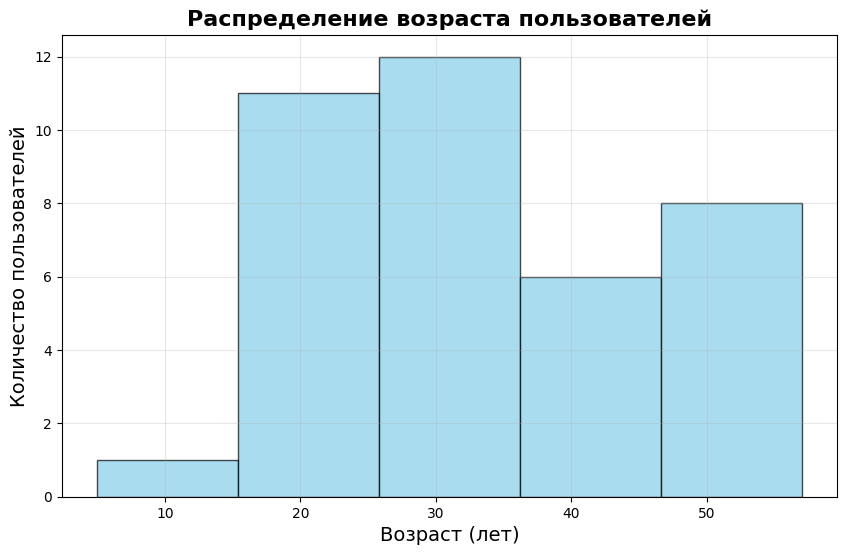

In [39]:
age_data = data[(data['age'].notna()) & (data['age'] < 100)]['age']

plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=5, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Распределение возраста пользователей', fontsize=16, fontweight='bold')
plt.xlabel('Возраст (лет)', fontsize=14)
plt.ylabel('Количество пользователей', fontsize=14)
plt.grid(True, alpha=0.3)
plt.savefig('figures/age_bin.png', dpi=300, bbox_inches='tight')

# Гистограмма показывает распределение возраста пользователей
# Большинство пользователей находятся в возрасте 20-40 лет

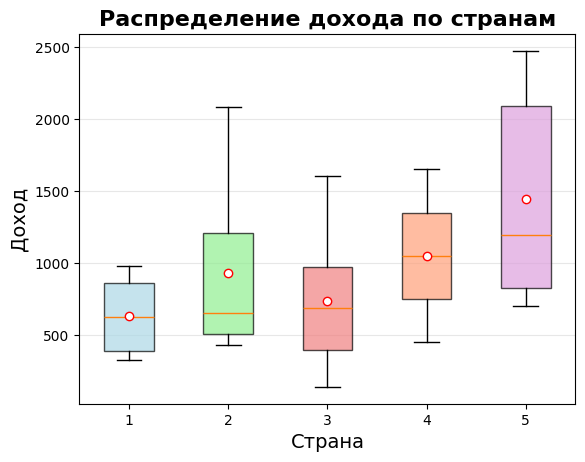

In [43]:
revenue_data = data[data['revenue'] > 0]
country_order = revenue_data.groupby('country')['revenue'].median().sort_values().index

boxplot = plt.boxplot([revenue_data[revenue_data['country'] == country]['revenue'] 
                       for country in country_order],
                      patch_artist=True,
                      showmeans=True,
                      meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'red'})

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'plum']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Распределение дохода по странам', fontsize=16, fontweight='bold')
plt.xlabel('Страна', fontsize=14)
plt.ylabel('Доход', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.savefig('figures/rev_box.png', dpi=300, bbox_inches='tight')

# Боксплот показывает распределение дохода по странам
# Дания (DE) имеет наибольший

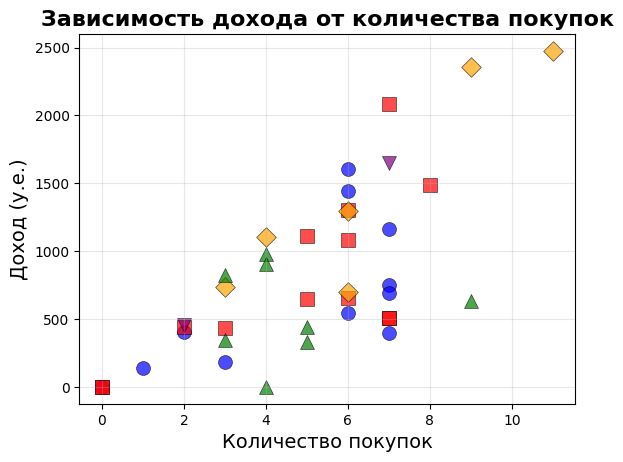

In [47]:
scatter_data = data[(data['purchases'] >= 0) & (data['revenue'] >= 0)]

countries = scatter_data['country'].unique()
colors = {'FR': 'blue', 'RU': 'red', 'US': 'green', 'DE': 'orange', 'CN': 'purple'}
markers = {'FR': 'o', 'RU': 's', 'US': '^', 'DE': 'D', 'CN': 'v'}

for country in countries:
    country_data = scatter_data[scatter_data['country'] == country]
    plt.scatter(country_data['purchases'], country_data['revenue'],
               c=colors[country], marker=markers[country], s=100,
               alpha=0.7, edgecolors='black', linewidth=0.5,
               label=f'{country}')

plt.title('Зависимость дохода от количества покупок', fontsize=16, fontweight='bold')
plt.xlabel('Количество покупок', fontsize=14)
plt.ylabel('Доход (у.е.)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.savefig('figures/rev_plot.png', dpi=300, bbox_inches='tight')

# Диаграмма показывает положительную корреляцию между количеством покупок и доходом